In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from VAT import VAT
from op_VAT import optimized_VAT
from pq_VAT import optimized_VAT_with_pq
from tqdm import tqdm

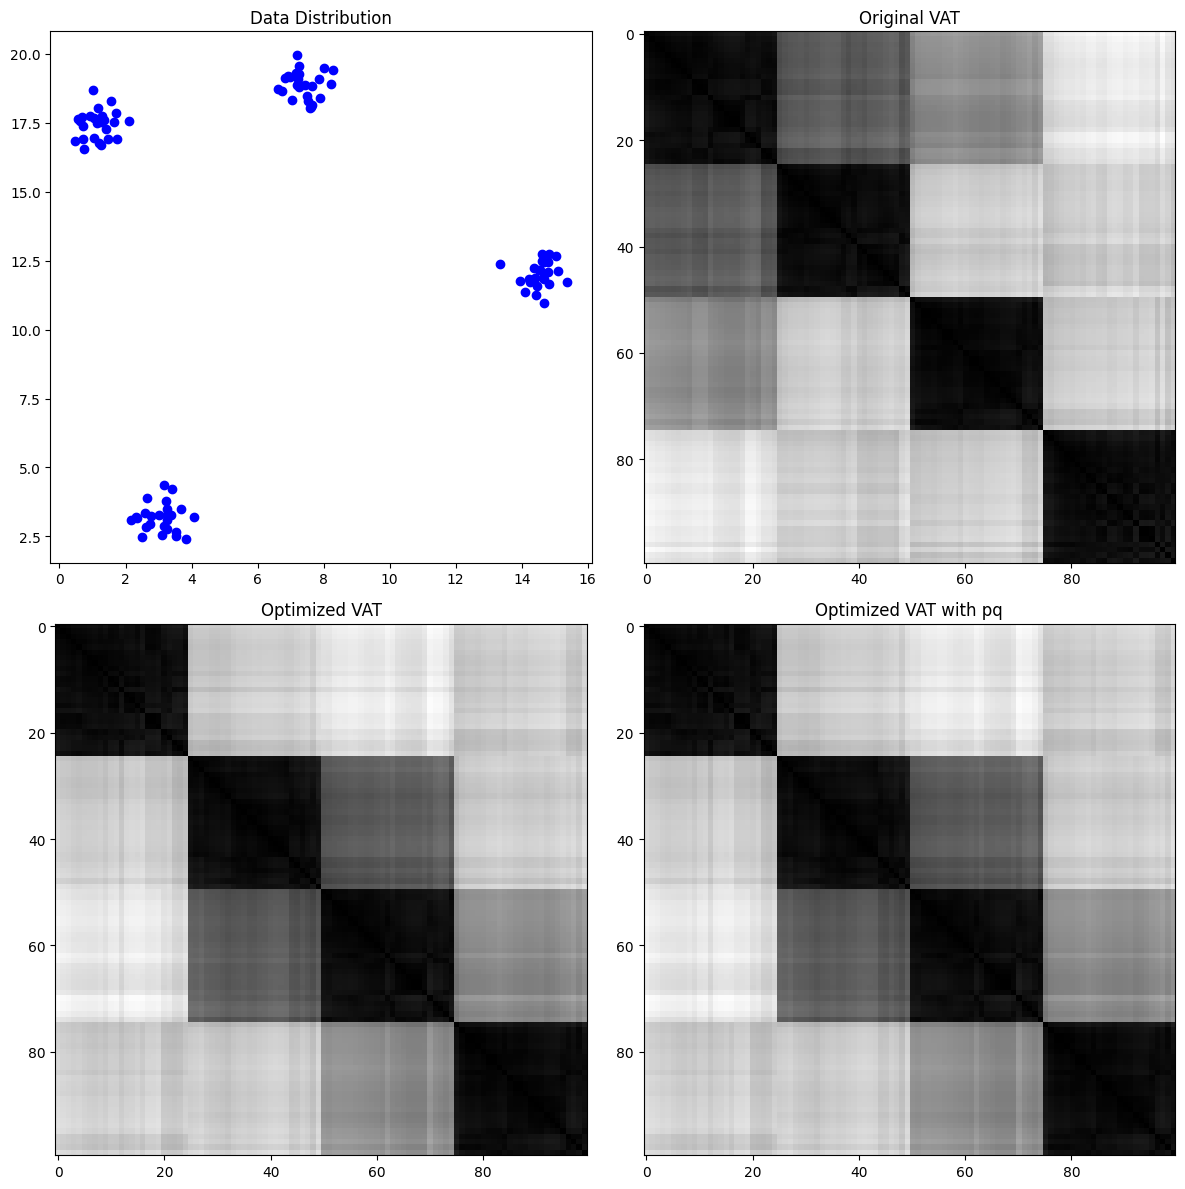

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

def image_test():
    # Generate a synthetic dataset with 4 clusters

    # data, _ = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_classes=2, n_clusters_per_class=1,
    #                             class_sep=2.0, shuffle=True)

    # change center_box value to manipulate the data distribution
    data, _ = make_blobs(n_samples=100, centers=4, cluster_std=0.5, random_state=42, center_box=(0, 20))
    
    # Compute the dissimilarity matrix (Euclidean distance)
    pairwise_dist = np.linalg.norm(data[:, np.newaxis] - data, axis=2)

    # Apply the original VAT function
    RV_original, _, _, _, _ = VAT(pairwise_dist)

    # Apply the optimized VAT function
    RV_optimized, _, _, _, _ = optimized_VAT(pairwise_dist)

    # Apply the optimized VAT with pq function
    RV_pq, _, _ = optimized_VAT_with_pq(pairwise_dist)

    # Plotting
    plt.figure(figsize=(12, 12))

    # Data distribution
    plt.subplot(2, 2, 1)
    plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o')
    plt.title('Data Distribution')

    # Original VAT
    plt.subplot(2, 2, 2)
    plt.imshow(RV_original, cmap='gray')
    plt.title('Original VAT')

    # Optimized VAT
    plt.subplot(2, 2, 3)
    plt.imshow(RV_optimized, cmap='gray')
    plt.title('Optimized VAT')

    # Optimized VAT with pq
    plt.subplot(2, 2, 4)
    plt.imshow(RV_pq, cmap='gray')
    plt.title('Optimized VAT with pq')

    plt.tight_layout()
    plt.show()

# To run the comparison, you can call:
image_test()

In [3]:
def generate_data(n_points):
    data, _ = make_blobs(n_samples=n_points, centers=4, cluster_std=0.5, random_state=42, center_box=(0, 20))
    return data

In [4]:
def compare_all_versions_execution_time():
    sizes = range(500, 10500, 1000)
    times_original = []
    times_optimized = []
    times_optimized_pq = []

    # for size in sizes:
    for size in tqdm(sizes, desc="Processing", ncols=100):
        data = generate_data(size)
        pairwise_dist = np.linalg.norm(data[:, np.newaxis] - data, axis=2)

        # Original VAT
        start_time = time.time()
        _ = VAT(pairwise_dist)
        end_time = time.time()
        times_original.append(end_time - start_time)

        # Optimized VAT
        start_time = time.time()
        _ = optimized_VAT(pairwise_dist)
        end_time = time.time()
        times_optimized.append(end_time - start_time)

        # Optimized VAT with Priority Queue
        start_time = time.time()
        _ = optimized_VAT_with_pq(pairwise_dist)
        end_time = time.time()
        times_optimized_pq.append(end_time - start_time)

    # Plotting the execution time comparison for all versions
    plt.figure(figsize=(12, 6))
    plt.plot(sizes, times_original, '-o', label='Original VAT')
    plt.plot(sizes, times_optimized, '-o', label='Optimized VAT')
    plt.plot(sizes, times_optimized_pq, '-o', label='Optimized VAT with PQ')
    plt.xlabel('Number of data points')
    plt.ylabel('Time (seconds)')
    plt.title('Execution Time Comparison (All Versions)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Running the execution time comparison for all versions
compare_all_versions_execution_time()

Processing:  90%|███████████████████████████████████████████▏    | 9/10 [3:41:26<24:36, 1476.32s/it]


MemoryError: Unable to allocate 689. MiB for an array with shape (9500, 9500) and data type float64